In [26]:
import pandas as pd #dataframe
import seaborn as sb #graphs
from matplotlib import pyplot as plt #graphics
import numpy as np # for mean, variance, and unique
from matplotlib.collections import LineCollection
%matplotlib inline

In [27]:
#read in the data
data = pd.read_csv('mergesort.csv')

In [28]:
#show the first 10 rows
display(data.head(10))

,Number of Threads,Time Taken
0,1,0.843326
1,1,0.823415
2,1,0.832699
3,1,0.832444
4,1,0.824510
5,1,0.837442
6,1,0.831326
7,1,0.877816
8,1,0.835668
9,1,0.862166


In [29]:
#show the last instances of duplicates
dupes = data.duplicated(keep='last')
display(dupes)


# we keep duplicates because even though they are unlikely to have the same value, it is still possible for different tests to have the same value

0       False
1       False
2       False
3       False
4       False
        ...  
1195    False
1196    False
1197    False
1198    False
1199    False
Length: 1200, dtype: bool

In [30]:
# Show statistical information about the data in the dataset
display(data.describe())

,Number of Threads,Time Taken
count,1200.000000,1200.000000
mean,12.500000,0.731882
std,6.925073,0.291468
min,1.000000,0.228992
25%,6.750000,0.485679
50%,12.500000,0.769907
75%,18.250000,0.929404
max,24.000000,4.359979


In [31]:
# Show statistical information about the representation of the dataset
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Number of Threads  1200 non-null   int64  
 1   Time Taken         1200 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 18.9 KB


None

<Figure size 640x480 with 0 Axes>

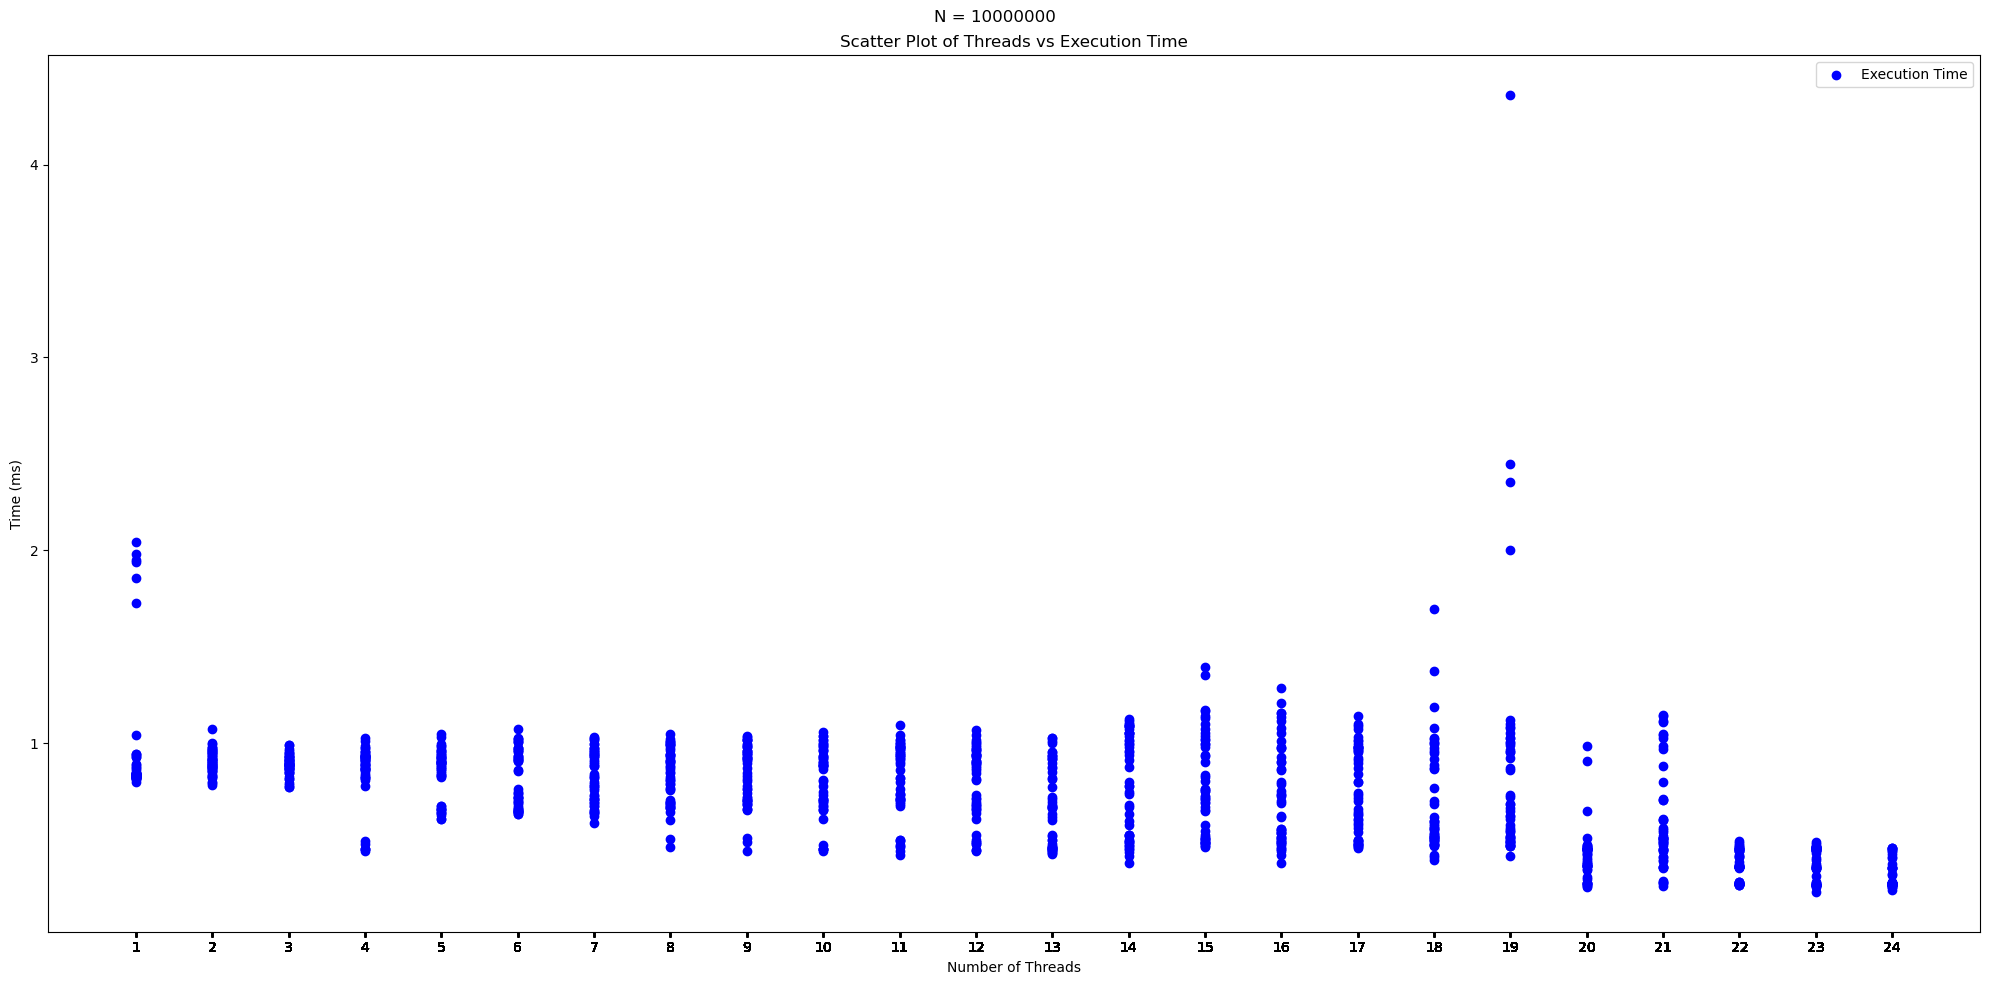

In [32]:
plt.set_cmap('RdPu')

#Scatter plot
plt.figure(figsize=(20, 10))
plt.scatter(x=data["Number of Threads"], y=data["Time Taken"], color='blue', label='Execution Time')
plt.title('Scatter Plot of Threads vs Execution Time')
plt.suptitle("N = 10000000")
plt.xlabel('Number of Threads')
plt.ylabel('Time (ms)')
# plt.yticks(data["Time Taken"])
plt.xticks(data["Number of Threads"])
plt.legend()
plt.tight_layout()
plt.show()

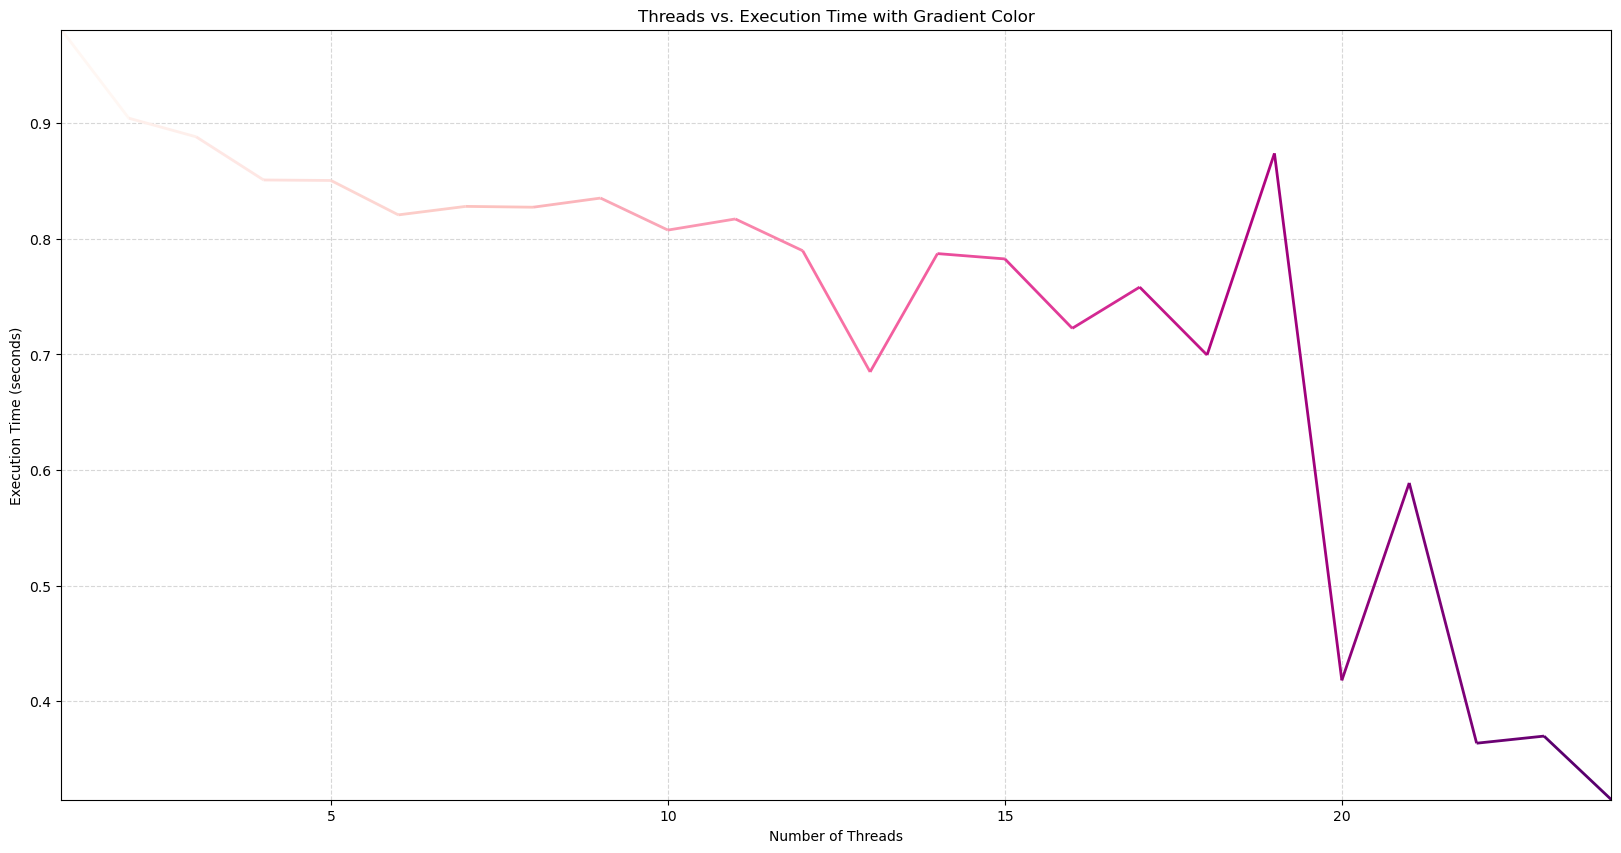

In [33]:
execution_time = data.groupby("Number of Threads")["Time Taken"].mean()
threads = execution_time.index

# threads = data["Number of Threads"]
# execution_time = data["Time Taken"]

sorted_indices = np.argsort(threads)
threads = np.array(threads)[sorted_indices]
execution_time = np.array(execution_time)[sorted_indices]

# Create line segments
points = np.array([threads, execution_time]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Define gradient colors
gradient = np.linspace(0, 1, len(threads))  # Scale for gradient from 0 to 1
cmap = plt.get_cmap('RdPu')  # Choose your colormap
norm = plt.Normalize(gradient.min(), gradient.max())

# Create LineCollection
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(gradient)
lc.set_linewidth(2)

# Plot with gradient
fig, ax = plt.subplots(figsize=(20, 10))
ax.add_collection(lc)
ax.set_xlim(threads.min(), threads.max())
ax.set_ylim(execution_time.min(), execution_time.max())

# Add grid and labels
plt.title("Threads vs. Execution Time with Gradient Color")
plt.xlabel("Number of Threads")
plt.ylabel("Execution Time (seconds)")
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.show()

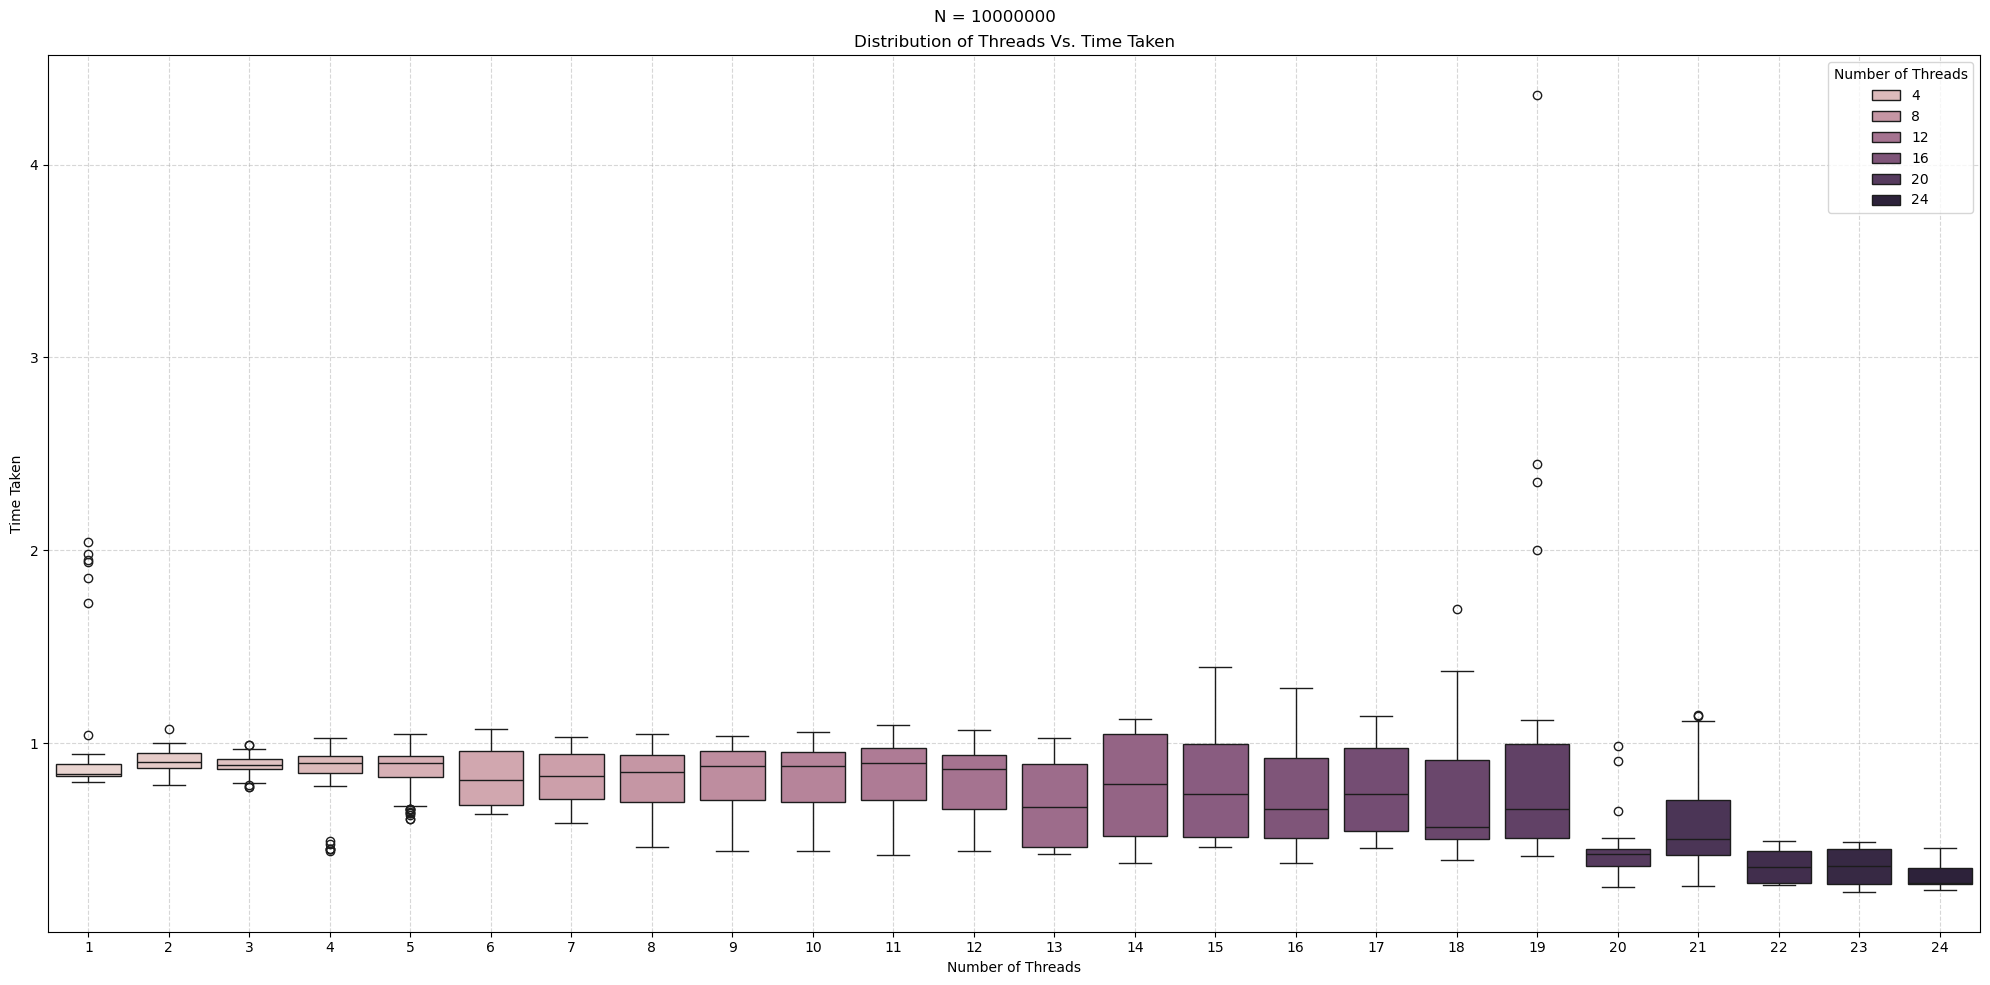

In [34]:
# make a boxplot for each feature except Outcome to spot outliers
plt.figure(figsize=(20, 10))
for col in data.drop(columns=["Number of Threads"]):
    plot = sb.boxplot(y=data[col], x=data["Number of Threads"], hue=data["Number of Threads"])
plt.suptitle("N = 10000000")
plot.set_title("Distribution of Threads Vs. Time Taken")
plot.set_xlabel("Number of Threads")
plot.set_ylabel("Time Taken")
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.yticks(minor=True)
plt.tight_layout()
plt.show()

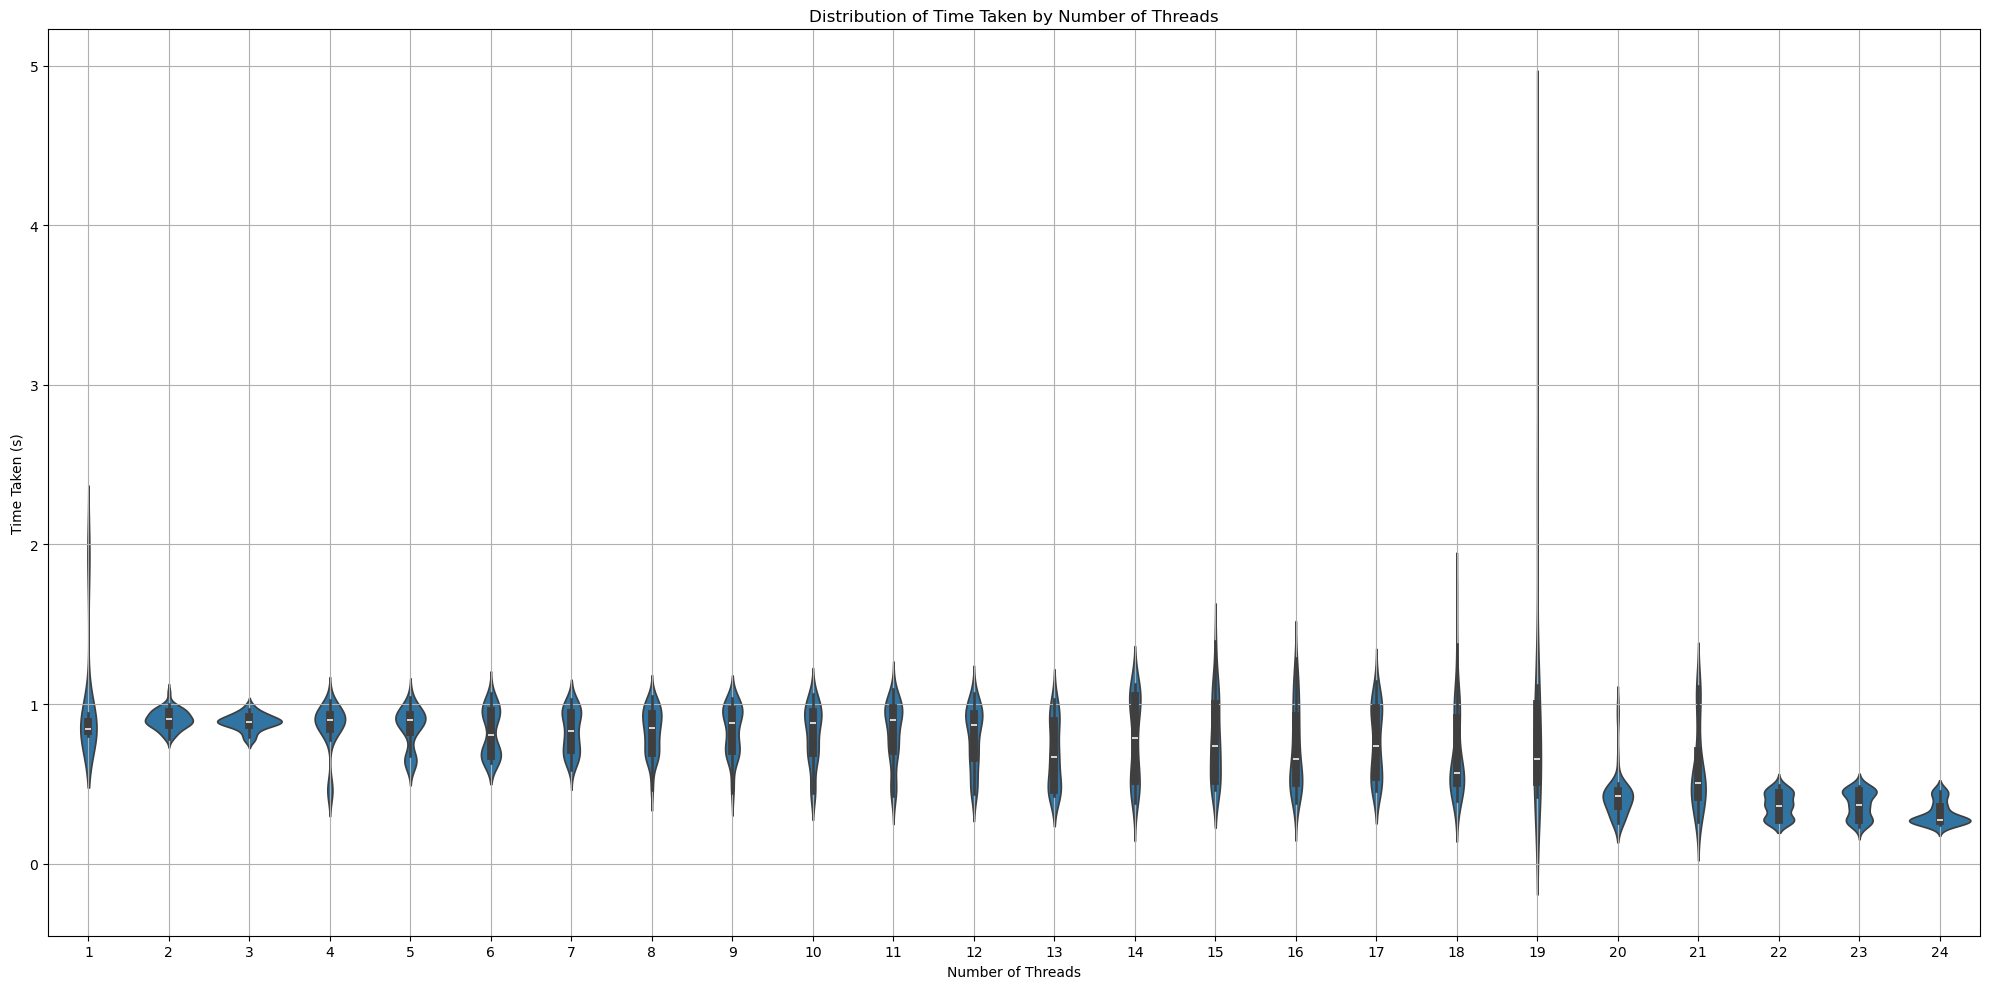

In [35]:
#violin plot
plt.figure(figsize=(20, 10))
sb.violinplot(x='Number of Threads', y='Time Taken', data=data)
plt.xlabel('Number of Threads')
plt.ylabel('Time Taken (s)')
plt.title('Distribution of Time Taken by Number of Threads')
plt.grid(True)
plt.tight_layout()
plt.show()

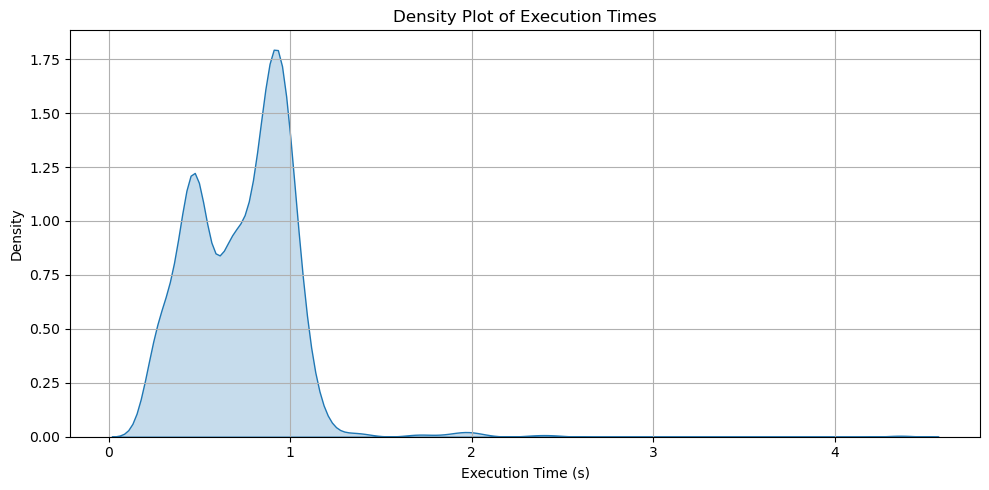

In [36]:
#density plot
plt.figure(figsize=(10, 5))
sb.kdeplot(data=data["Time Taken"], label=None ,fill=True)
plt.xlabel('Execution Time (s)')
plt.ylabel('Density')
plt.title('Density Plot of Execution Times')
# plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

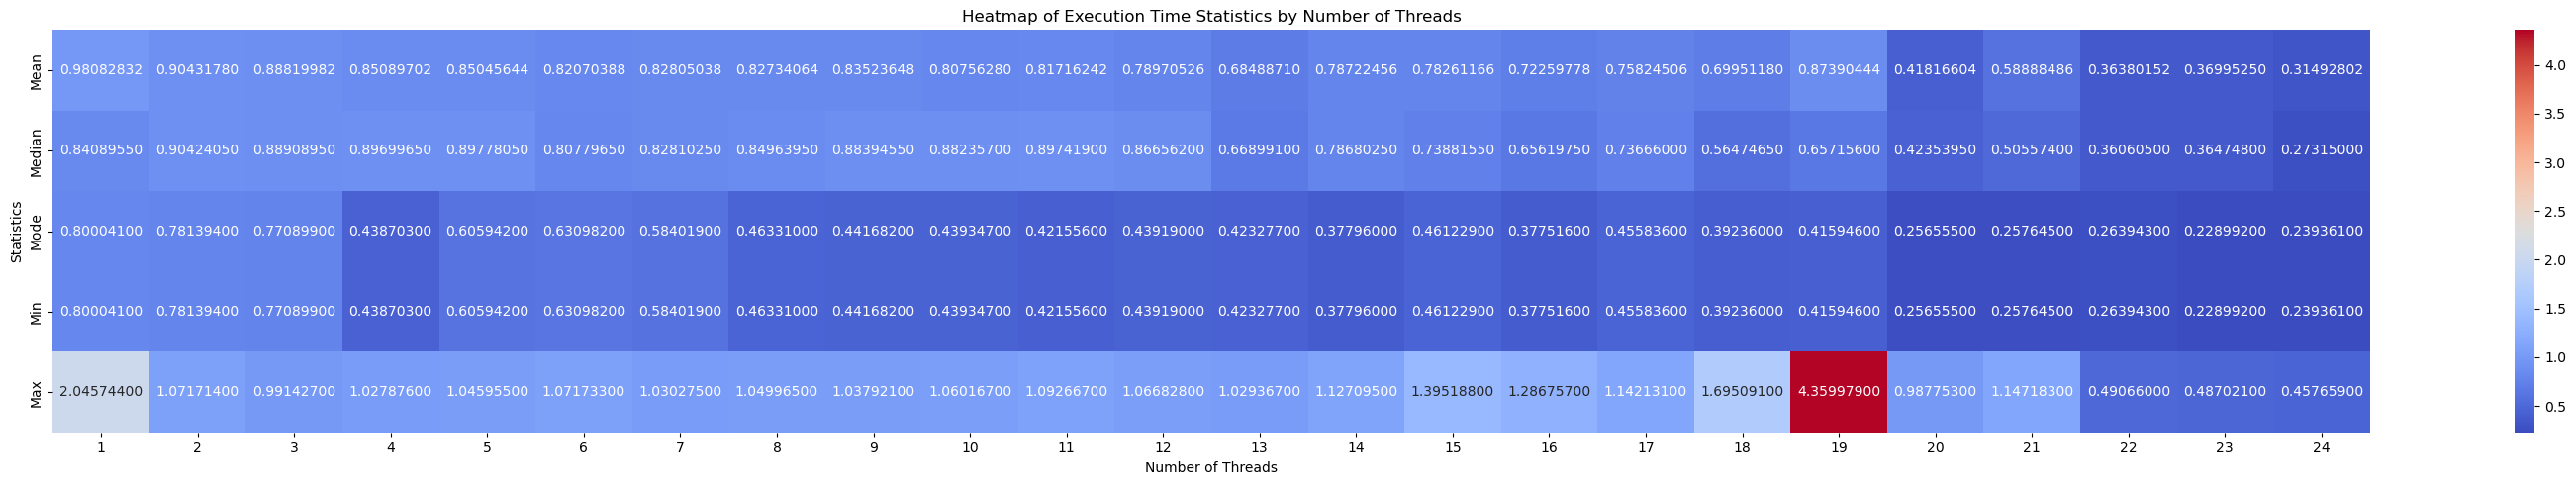

In [37]:
# stats heatmap
stats = data.groupby('Number of Threads')['Time Taken'].agg(['mean', 'median', lambda x: x.mode()[0], 'min', 'max'])
stats.columns = ['Mean', 'Median', 'Mode', 'Min', 'Max']

plt.figure(figsize=(30, 5))
sb.heatmap(stats.T, annot=True, fmt=".8f", cmap="coolwarm", xticklabels=stats.index, yticklabels=stats.columns)
plt.xlabel('Number of Threads')
plt.ylabel('Statistics')
plt.title('Heatmap of Execution Time Statistics by Number of Threads')
plt.tight_layout()
plt.show()

<Figure size 3000x2000 with 0 Axes>

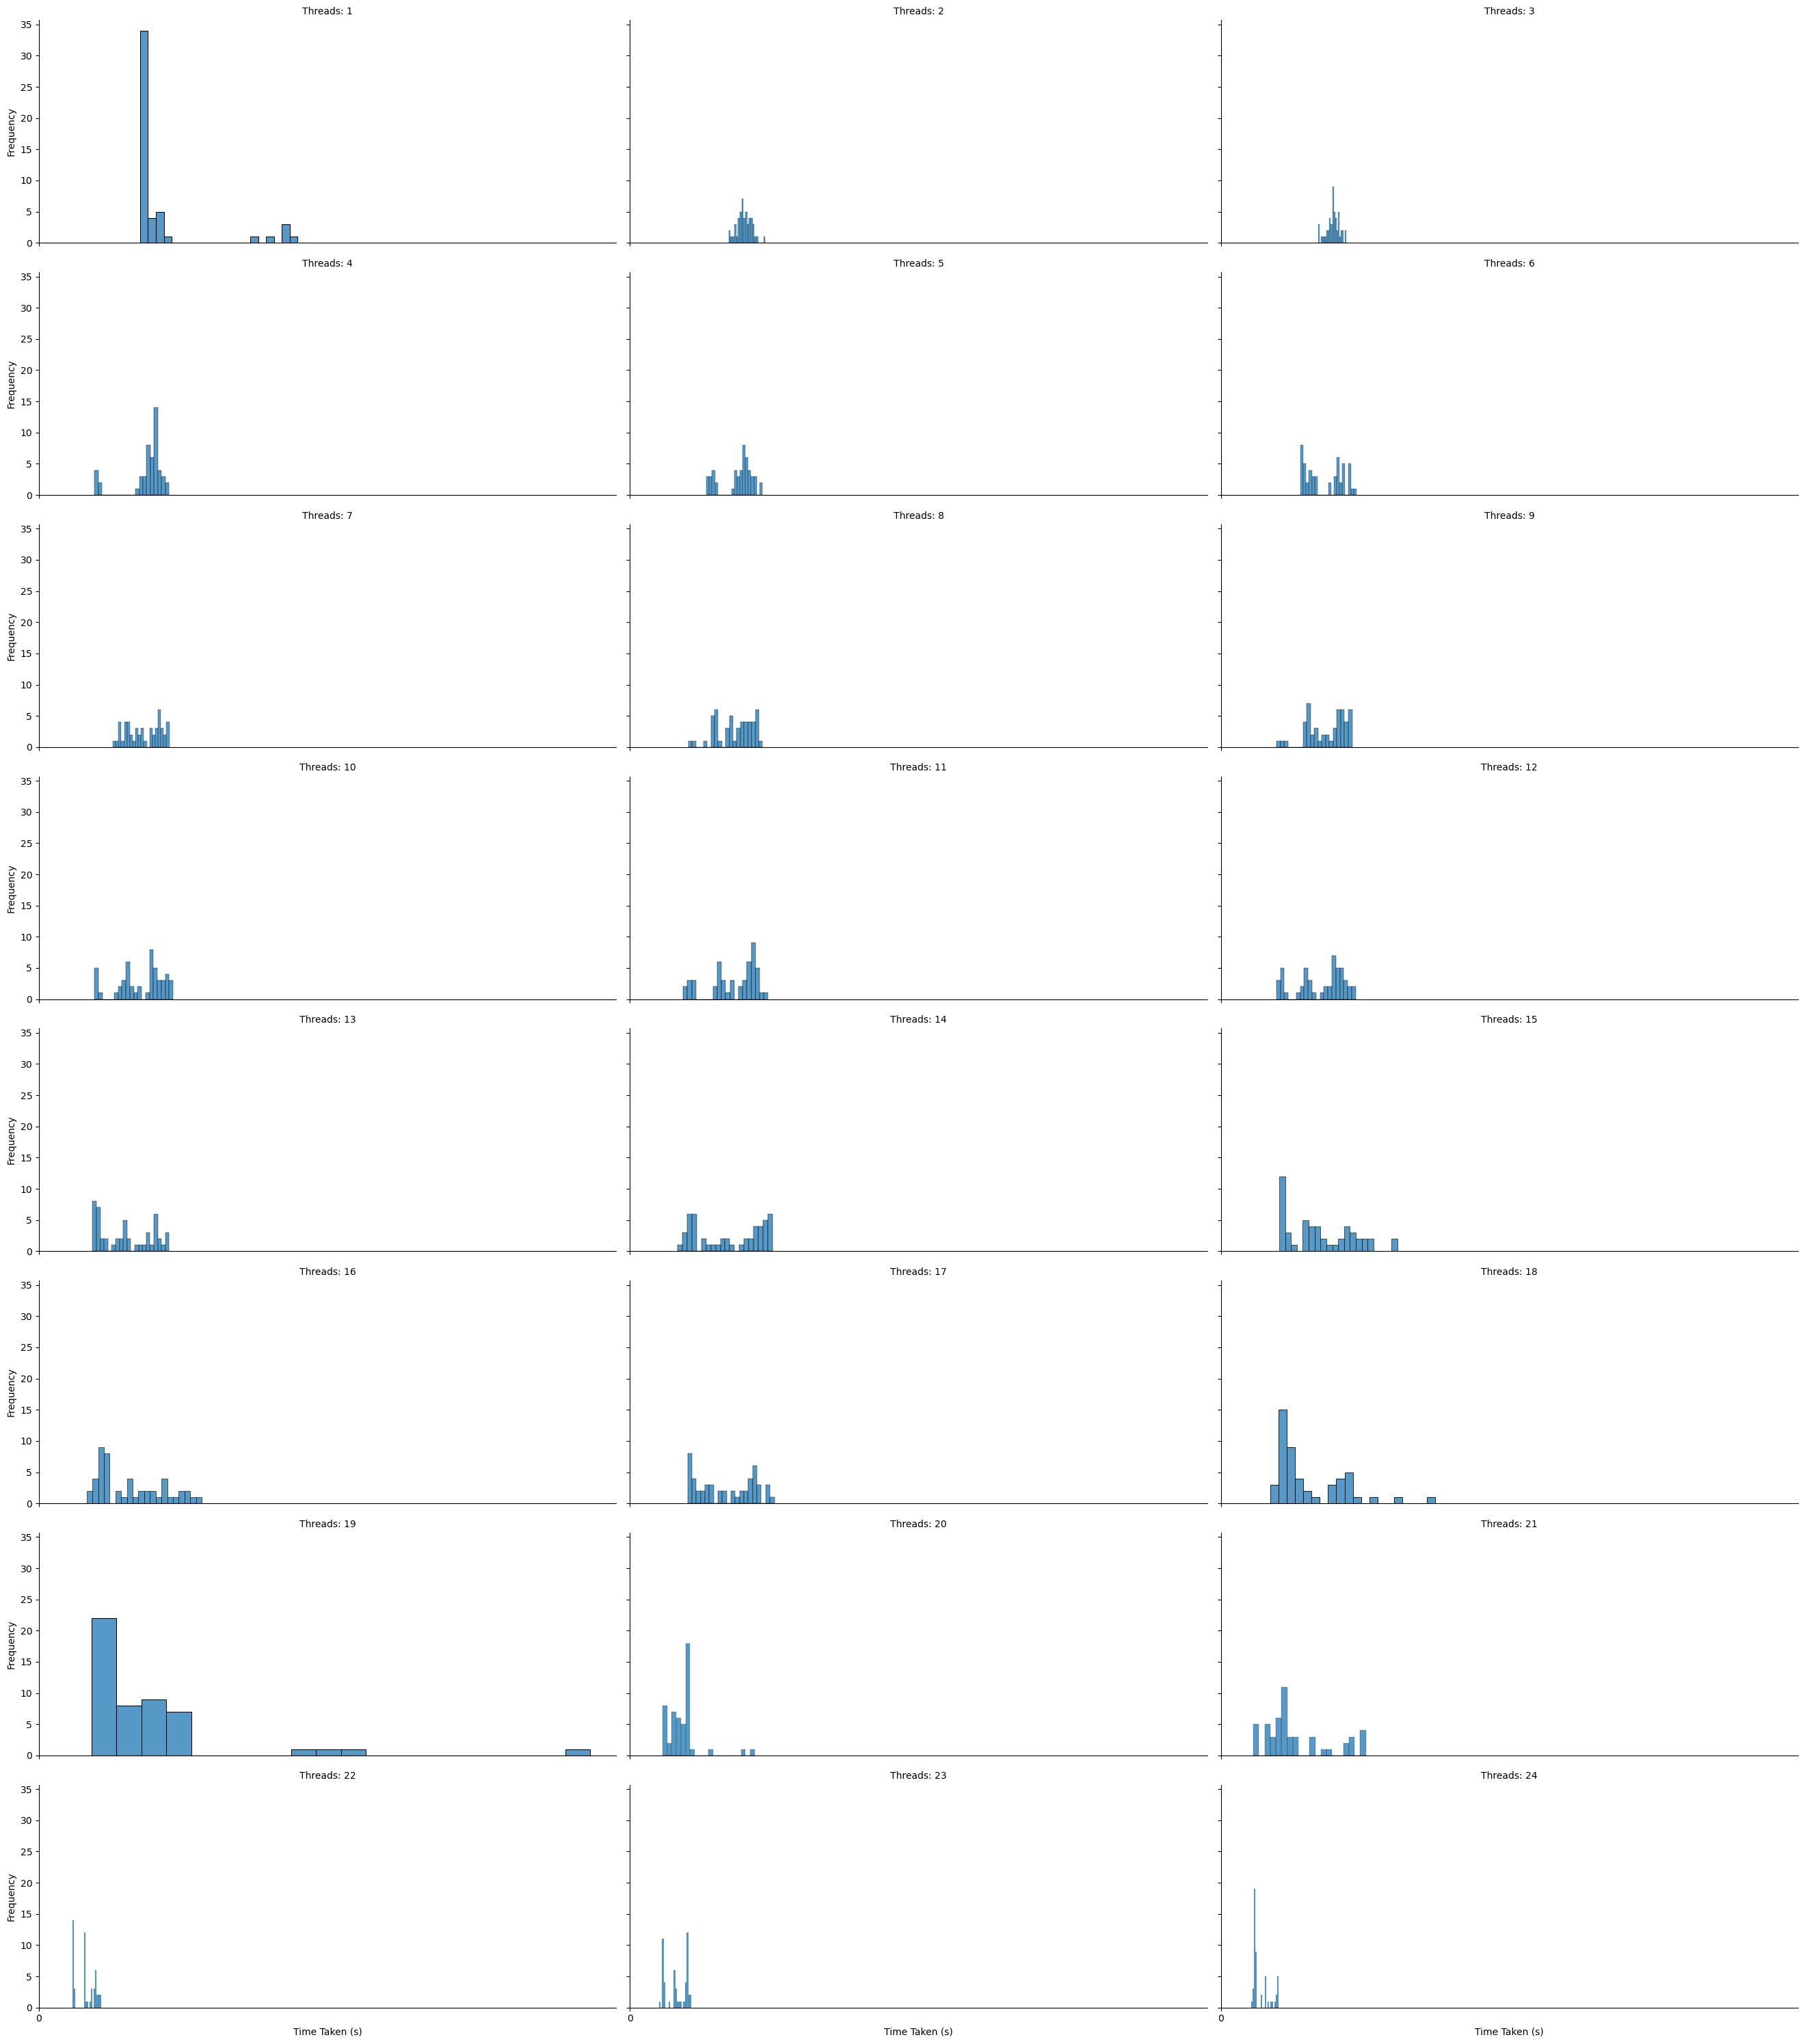

In [38]:
plt.figure(figsize=(30, 20))
g = sb.FacetGrid(data, col="Number of Threads", col_wrap=3, sharex=True, sharey=True)
g.map(sb.histplot, "Time Taken", bins=20)
g.set_axis_labels("Time Taken (s)", "Frequency")
g.set_titles("Threads: {col_name}")
g.figure.subplots_adjust(top=0.9)
g.figure.set_size_inches(26.5,30)
for ax in g.axes.flatten():
    ax.set_xticks(range(0, int(data["Time Taken"].max()) + 1, 5)) 
# g.figure.tight_layout()
plt.tight_layout()
plt.show()

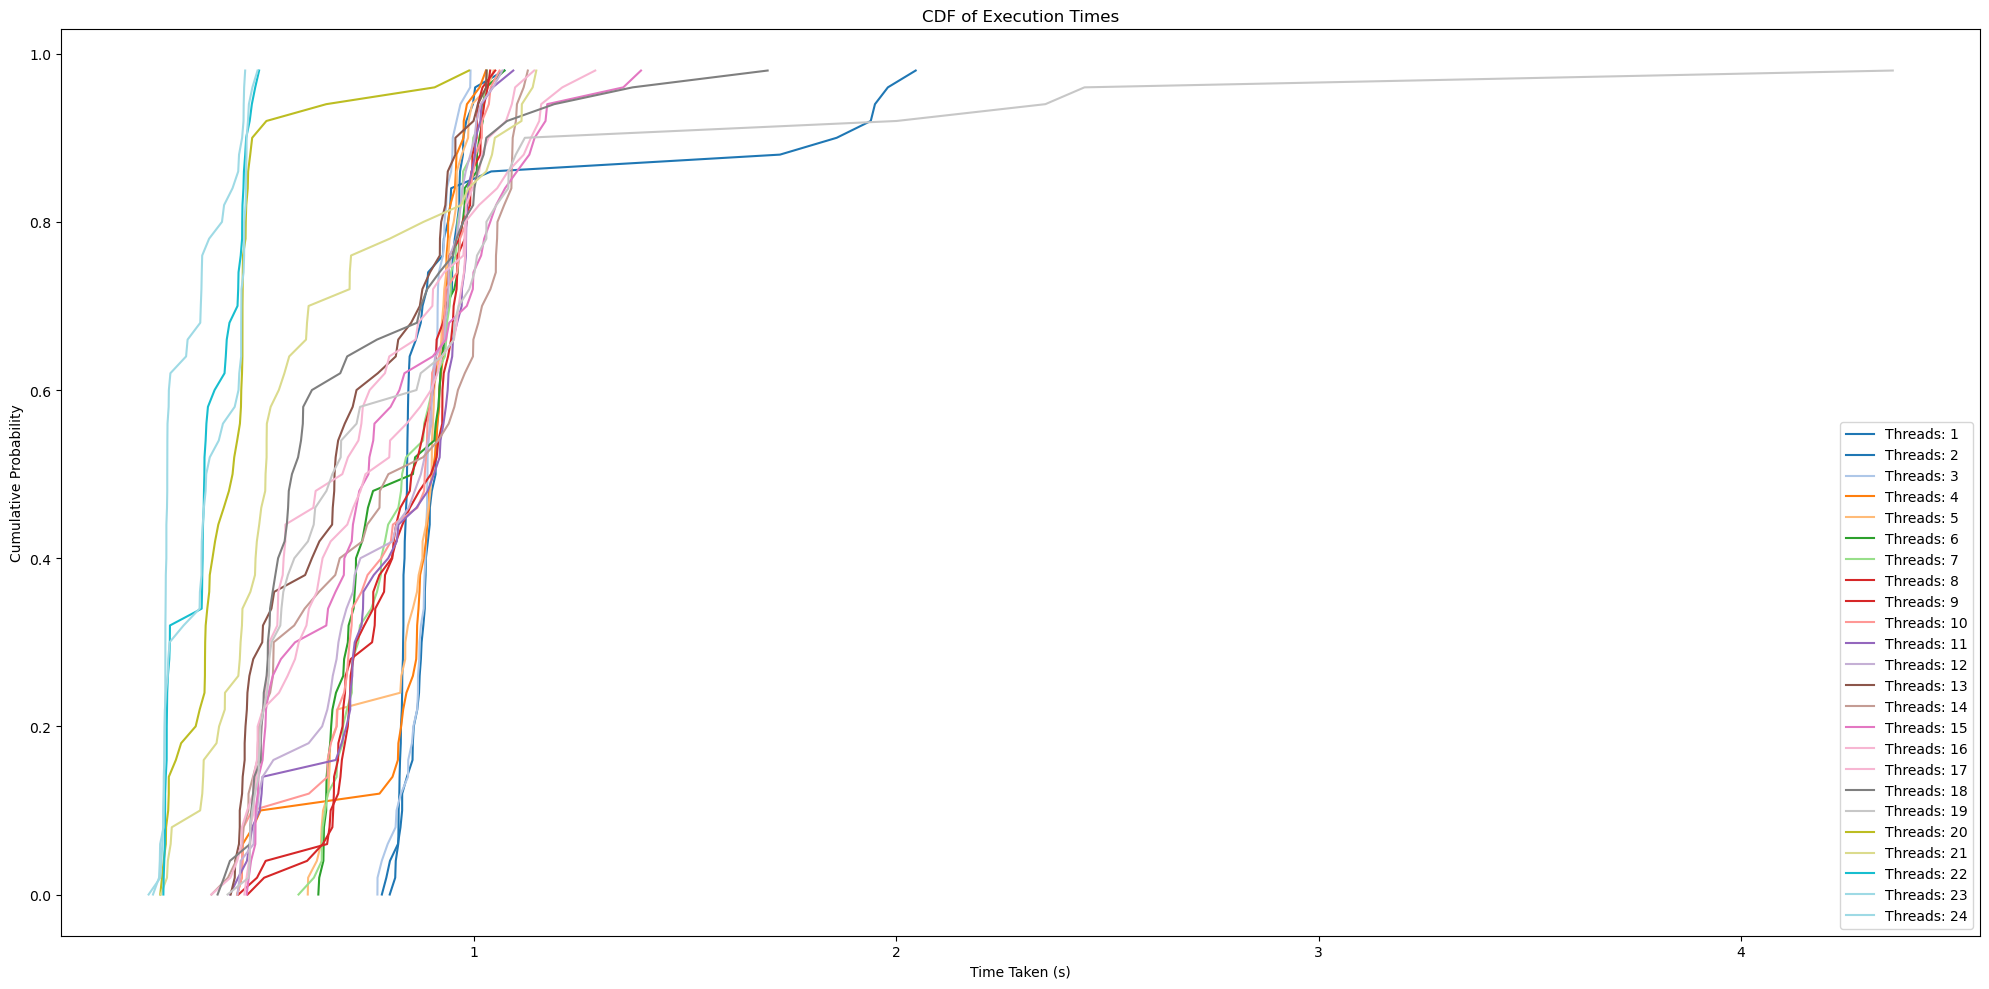

In [39]:
plt.figure(figsize=(20, 10))
colors = plt.cm.tab20(np.linspace(0, 1, len(data['Number of Threads'].unique())))
for thread in data['Number of Threads'].unique():
    subset = data[data['Number of Threads'] == thread]['Time Taken']
    sorted_times = np.sort(subset)
    cdf = np.arange(len(sorted_times)) / len(sorted_times)
    plt.plot(sorted_times, cdf, label=f'Threads: {thread}', color=colors[thread - 1])
    # plt.step(sorted_times, cdf, label=f'Threads: {thread}', color=colors[thread - 1])

plt.xlabel('Time Taken (s)')
plt.ylabel('Cumulative Probability')
plt.title('CDF of Execution Times')
plt.legend()
plt.tight_layout()
plt.show()